In [1]:
a = 0.1
b = 0.2
c = a + b
print (c)

0.30000000000000004


this is my notebook, 

i want to compute a + b = c

a = 0.1

b = 0.2

but c differnt from 0.3


$a^2 + b^2 = c^2$





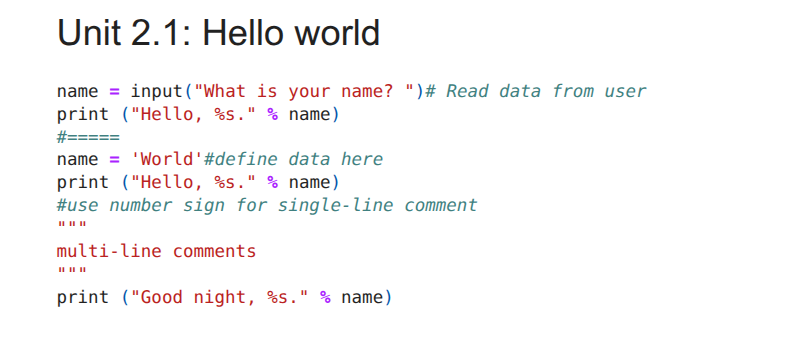


